29 Dec 2024 Sunday

## IMDB dataset movie review - Classification analysis

In [ ]:
# Load the dataset

from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [ ]:
# see through the data

print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# decode the text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# prepare the data with multi hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [ ]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
x_train[0].shape

(10000,)

In [ ]:
x_test[0].shape

(10000,)

In [ ]:
y_train[0]

1

In [ ]:
# float conversion
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
y_train[0]

1.0

# build the model

In [ ]:
# create the model
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



In [ ]:
# compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# setting aside a validation set # used for monitoring the epoch performance
# will also help us in hyperparameter tuning
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7124 - loss: 0.5764 - val_accuracy: 0.8740 - val_loss: 0.3407
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9016 - loss: 0.3035 - val_accuracy: 0.8840 - val_loss: 0.2699
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9229 - loss: 0.2250 - val_accuracy: 0.8890 - val_loss: 0.2540
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9363 - loss: 0.1866 - val_accuracy: 0.8950 - val_loss: 0.2504
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9449 - loss: 0.1602 - val_accuracy: 0.8950 - val_loss: 0.2675
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9529 - loss: 0.1413 - val_accuracy: 0.8790 - val_loss: 0.2921
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9570 - loss: 0.1281 - val_accuracy: 0.9000 - val_loss: 0.2820
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9635 - loss: 0.1123 - val_accuracy: 0.8870 - v

In [ ]:
# the loss value increase suggests its an overfitting/ overtrained model so regularisation is needed

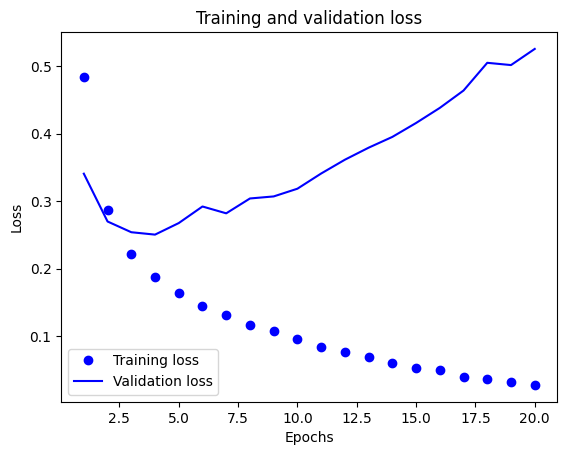

In [ ]:
# plotting the training loss and validation loss
import matplotlib.pyplot as plt
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

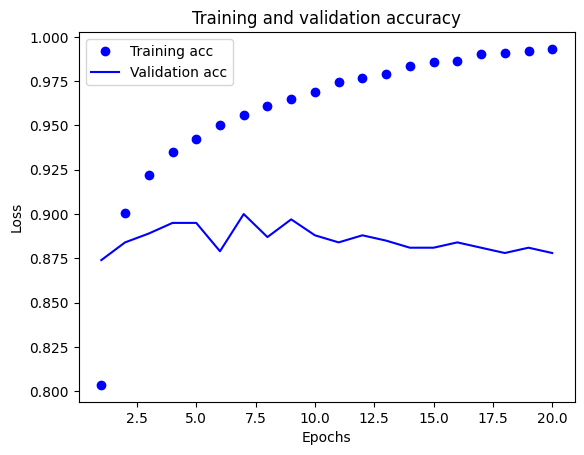

In [ ]:
# plot for accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retry with regularization

In [ ]:
#regularization
from keras import regularizers,models

#model creation
model2 = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# setting aside a validation set # used for monitoring the epoch performance
# will also help us in hyperparameter tuning
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
# train the model
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5698 - loss: 0.7150 - val_accuracy: 0.8440 - val_loss: 0.5759
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7514 - loss: 0.5855 - val_accuracy: 0.8700 - val_loss: 0.4599
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8318 - loss: 0.4855 - val_accuracy: 0.8710 - val_loss: 0.3828
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8689 - loss: 0.4137 - val_accuracy: 0.8680 - val_loss: 0.3544
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8894 - loss: 0.3637 - val_accuracy: 0.8810 - val_loss: 0.3291
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9009 - loss: 0.3419 - val_accuracy: 0.8900 - val_loss: 0.3205
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9102 - loss: 0.3131 - val_accuracy: 0.8850 - val_loss: 0.3217
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9188 - loss: 0.2940 - val_accuracy: 0.8920 - v

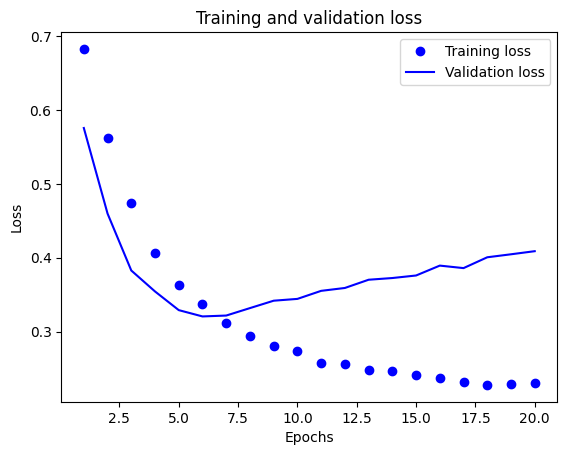

In [ ]:
# plotting the training loss and validation loss
import matplotlib.pyplot as plt
val_loss = history2.history['val_loss']
loss = history2.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

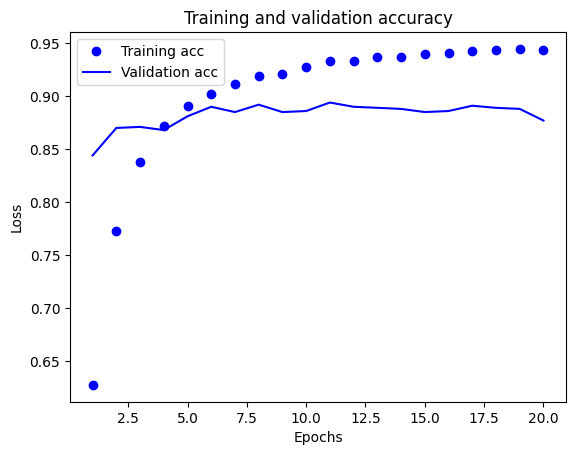

In [ ]:
# plot for accuracy
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()